## 1. Load [Korean - English Parallel Corpus](https://www.kaggle.com/datasets/rareloto/naver-dictionary-conversation-of-the-day) Data

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import math
import time

In [45]:
from sklearn.model_selection import train_test_split

# 파일 경로
file_path = '/content/drive/MyDrive/Colab Notebooks/2024-2 딥러닝/기말 프로젝트/Korean - English Parallel Corpus(conversation).csv'

data = pd.read_csv(file_path)

# train, validation, test로 나누기
train_data, temp = train_test_split(data, test_size=0.3, random_state=42)  # train 70%, 나머지 30%
val_data, test_data = train_test_split(temp, test_size=0.5, random_state=42)  # validation과 test 각각 15%

# 결과 확인
print(f"Train data: {len(train_data)}")
print(f"Validation data: {len(val_data)}")
print(f"Test data: {len(test_data)}")

data.head()

Train data: 3194
Validation data: 684
Test data: 685


,date,conversation_id,kor_sent,eng_sent,qna_id
0,20171204,1,안녕하세요?,Hello.,NaN
1,20171204,2,"네, 안녕하세요?",Hello.,NaN
2,20171204,3,저는 유양이에요.,I'm Yooyang.,NaN
3,20171204,4,저는 김우빈이에요.,"I'm Kim, Woobin.",NaN
4,20171205,1,유양 씨는 중국 사람이에요?,"Ms. Yooyang, are you Chinese?",NaN


In [46]:
data.info() # 849개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4563 entries, 0 to 4562
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             4563 non-null   int64  
 1   conversation_id  4563 non-null   int64  
 2   kor_sent         4563 non-null   object 
 3   eng_sent         4563 non-null   object 
 4   qna_id           0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 178.4+ KB


In [47]:
# 영어와 한국어 문장 추출
train_en_sents = train_data['eng_sent'].tolist()  # 영어 문장
train_kr_sents = train_data['kor_sent'].tolist()  # 한국어 문장

In [48]:
train_en_sents[:5]

["I heard you took a break from school this semester. What's going on?",
 'Yes, my sister is an office worker. ',
 "Yes. It's because they believe if one write his name in red, he will die or something bad happens.",
 'Chicken and ginseng are a really good combination. You can eat a lot of that.',
 'But I have a lot of customers before you, so you might have to wait long.']

In [49]:
train_kr_sents[:5]

['이번 학기에 휴학했다면서? 무슨 일이 있어?',
 '네, 우리 누나는 회사원이에요.',
 '응, 빨간색으로 이름을 쓰면 죽거나 불길한 일이 생긴다고 생각하거든.',
 '닭고기하고 인삼은 정말 좋은 궁합이야. 그건 많이 먹어도 돼.',
 '그런데 먼저 오신 분들이 많아서 좀 오래 기다리셔야 합니다.']

## 2. Tokenization

In [50]:
import nltk
from nltk.tokenize import word_tokenize

In [51]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [52]:
print(word_tokenize(train_en_sents[0]))

['I', 'heard', 'you', 'took', 'a', 'break', 'from', 'school', 'this', 'semester', '.', 'What', "'s", 'going', 'on', '?']


In [53]:
en_tok_len = [len(word_tokenize(t)) for t in train_en_sents]
kr_tok_len = [len(word_tokenize(t)) for t in train_kr_sents]

In [54]:
print(f">> En Max length : {np.max(en_tok_len):.2f}")
print(f">> En Median length : {np.median(en_tok_len):.2f}")
print(f">> Kr Max length : {np.max(kr_tok_len):.2f}")
print(f">> Kr Median length : {np.median(kr_tok_len):.2f}")

>> En Max length : 45.00
>> En Median length : 13.00
>> Kr Max length : 22.00
>> Kr Median length : 8.00




---



In [55]:
!pip show spacy

Name: spacy
Version: 3.7.5
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: en-core-web-sm, fastai, ko-core-news-sm


In [56]:
!python -m spacy download en_core_web_sm --quiet
!python -m spacy download ko_core_news_sm --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 107.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 95.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ko_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [57]:
import spacy

# Load spaCy models for English and Korean
nlp_en = spacy.load('en_core_web_sm', disable=["parser", "ner"])
nlp_kr = spacy.load('ko_core_news_sm', disable=["parser", "ner"])

# Tokenize a list of English sentences
def en_tokenize_batch(texts):
    docs = nlp_en.pipe(texts)  # pipe 메서드는 여러 문서나 text를 한 번에 처리해줌 -> 리스트 안에 있는 각 문장을 Doc 객체로 변환
    return [[token.text for token in doc] for doc in docs]

# Tokenize a list of Korean sentences
def kr_tokenize_batch(texts):
    docs = nlp_kr.pipe(texts)  # Process texts in batch using `pipe`
    return [[token.text for token in doc] for doc in docs]

In [58]:
# lowercasing
train_en_sents = [sent.lower() for sent in train_en_sents] # 한국어는 대소문자 구분이 없으므로 안해도 됨.

# tokenization
train_en_tokenized = en_tokenize_batch(train_en_sents)
train_kr_tokenized = kr_tokenize_batch(train_kr_sents)

In [59]:
print(train_en_tokenized[0])
print(train_kr_tokenized[0])

['i', 'heard', 'you', 'took', 'a', 'break', 'from', 'school', 'this', 'semester', '.', 'what', "'s", 'going', 'on', '?']
['이번', '학기에', '휴학했다면서', '?', '무슨', '일이', '있어', '?']


## 3. Build Vocabulary

In [60]:
from collections import Counter

In [61]:
def build_vocab(tokenized_sent):

  counter = Counter(token for lists in tokenized_sent for token in lists) # lists에 문장의 토큰 리스트가 담기고, token에 lists의 토큰들이 담긴다.

  vocab = {}  # word -> idx
  vocab["<pad>"] = 0
  vocab["<unk>"] = 1
  vocab["<bos>"] = 2
  vocab["<eos>"] = 3

  idx = 4
  for word, freq in counter.most_common():
    if word not in vocab:
      vocab[word] = idx
      idx += 1

  return vocab

In [62]:
train_en_vocab = build_vocab(train_en_tokenized)
train_kr_vocab = build_vocab(train_kr_tokenized)

In [63]:
print("Vocabulary size")
print(f">> English: {len(train_en_vocab):,}") # 공백 기준이 아닌 spacy로 더 세밀하게 토큰화했는데 vocab size가 준 이유
print(f">>  Korean: {len(train_kr_vocab):,}")

Vocabulary size
>> English: 3,583
>>  Korean: 8,225


In [64]:
for t, i in train_en_vocab.items():
    if i == 7:
        break
    print(f"{t}: {i}")

<pad>: 0
<unk>: 1
<bos>: 2
<eos>: 3
.: 4
i: 5
,: 6


In [65]:
for t, i in train_kr_vocab.items():
    if i == 7:
        break
    print(f"{t}: {i}")

<pad>: 0
<unk>: 1
<bos>: 2
<eos>: 3
.: 4
?: 5
,: 6


## 4. Convert Tokens to Integer IDs

In [66]:
import torch

In [67]:
train_en_vocab['<unk>']

1

In [68]:
print(train_en_tokenized[:2])

[['i', 'heard', 'you', 'took', 'a', 'break', 'from', 'school', 'this', 'semester', '.', 'what', "'s", 'going', 'on', '?'], ['yes', ',', 'my', 'sister', 'is', 'an', 'office', 'worker', '.']]


In [69]:
def encode_with_vocab(tokenized_sentences, vocab):

    unk_id = vocab["<unk>"]  # 1

    result = []
    for sent in tokenized_sentences:
        sent = ['<bos>'] + sent + ['<eos>']
        encoded = [vocab.get(t, unk_id) for t in sent]  # 문장의 토큰들을 각 토큰의 index로 바꿔주기
        result.append(
            torch.tensor(encoded, dtype=torch.long)
        )

    return result

In [70]:
train_en_encoded = encode_with_vocab(train_en_tokenized, train_en_vocab)
train_kr_encoded = encode_with_vocab(train_kr_tokenized, train_kr_vocab)

In [71]:
print(['<bos>'] + train_en_tokenized[0] + ['<eos>'])
print(train_en_encoded[0])

['<bos>', 'i', 'heard', 'you', 'took', 'a', 'break', 'from', 'school', 'this', 'semester', '.', 'what', "'s", 'going', 'on', '?', '<eos>']
tensor([  2,   5, 117,  10, 623,  11, 459,  62, 180,  27, 800,   4,  32,  15,
         46,  33,   8,   3])


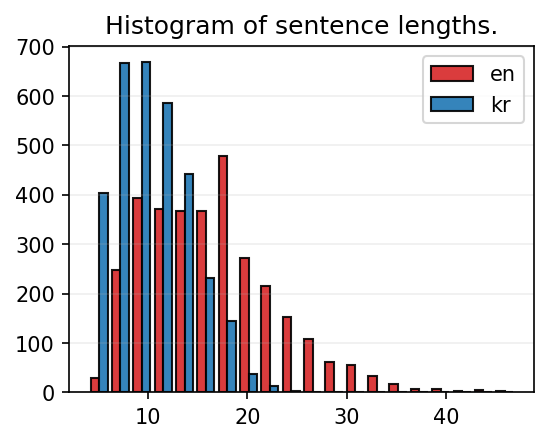

In [72]:
en_lengths = list(map(lambda x: len(x), train_en_encoded))
kr_lengths = list(map(lambda x: len(x), train_kr_encoded))
lengths = np.array([en_lengths, kr_lengths]).T

plt.figure(figsize=(4, 3), dpi=150)
plt.hist(lengths, bins=20,
         color=['tab:red', 'tab:blue'], edgecolor='k',
         alpha=0.9, label=['en', 'kr'])
plt.title('Histogram of sentence lengths.')
plt.legend(loc='upper right')
plt.grid(True, axis='y', which='major', alpha=.2)
plt.show()

In [73]:
lengths.mean(axis=0)  # en, kr 평균 길이

array([16.39041954, 10.49185974])

#### Validation data, Test data 적용

In [74]:
# dataset 자체가 작아서 train data로 만든 vocab은 validation data, test data의 문장을 index로 인코딩할 때 제대로 안될 수가 있음.
# 그렇기 때문에 전체 dataset으로 vocab을 만들어준다.

english = data['eng_sent'].tolist()
korean = data['kor_sent'].tolist()

english_sents = [sent.lower() for sent in english]
korean_sents = [sent.lower() for sent in korean]

english_tokened = en_tokenize_batch(english_sents)
korean_tokened = kr_tokenize_batch(korean_sents)

english_vocab = build_vocab(english_tokened)
korean_vocab = build_vocab(korean_tokened)

print("Vocabulary size")
print(f">> English: {len(english_vocab):,}") # 3,583 -> 4,102
print(f">>  Korean: {len(korean_vocab):,}") # 8,225 -> 10,303

Vocabulary size
>> English: 4,102
>>  Korean: 10,303


In [75]:
"""
    For both validation & test data, do:
        1. Tokenization
        2. Integer Encoding (tokens to ids)
"""

# Validation data
val_en_sents = val_data['eng_sent'].tolist() # listing
val_kr_sents = val_data['kor_sent'].tolist()

val_en_sents = [sent.lower() for sent in val_en_sents] # lowercasing

val_en_tokenized = en_tokenize_batch(val_en_sents) # tokenizing
val_kr_tokenized = kr_tokenize_batch(val_kr_sents)

val_en_encoded = encode_with_vocab(val_en_tokenized, english_vocab) # 전체 데이터셋으로 만든 vocab
val_kr_encoded = encode_with_vocab(val_kr_tokenized, korean_vocab)


# Test data
test_en_sents = test_data['eng_sent'].tolist()
test_kr_sents = test_data['kor_sent'].tolist()

test_en_sents = [sent.lower() for sent in test_en_sents]

test_en_tokenized = en_tokenize_batch(test_en_sents)
test_kr_tokenized = kr_tokenize_batch(test_kr_sents)

test_en_encoded = encode_with_vocab(test_en_tokenized, english_vocab)
test_kr_encoded = encode_with_vocab(test_kr_tokenized, korean_vocab)

In [76]:
print(val_en_sents[3])
print(val_en_encoded[3])

come on, it's not possible that she hates you for such a small matter. such small cultural differences will be understood over time.
tensor([   2,   78,   31,    6,   12,   14,   40,  284,   17,  116, 3353,   10,
          25,  185,   11,  372,  567,    4,  185,  372,  793, 3354,   29,   37,
        3355,  176,   43,    4,    3])


In [77]:
print(test_kr_sents[0])
print(test_kr_encoded[0]) # '<bos>', '시험이', '어제', '끝났는데', '오늘', '또', '도서관에', '가', '?', '<eos>'

시험이 어제 끝났는데 오늘 또 도서관에 가?
tensor([   2,  643,  100, 2675,   41,  149,  927,   74,    5,    3])


In [78]:
print(len(val_en_encoded) == len(val_kr_encoded))  # check size matches
print(len(test_en_encoded) == len(test_kr_encoded))

True
True


## 5. Create [PyTorch Datasets & DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

In [79]:
from torch.utils.data import Dataset

class MachineTranslation(Dataset):
    def __init__(self,
                 source_data: list[torch.LongTensor],
                 target_data: list[torch.LongTensor],
                 ):
        super(MachineTranslation, self).__init__()

        self.src_data = source_data
        self.trg_data = target_data
        assert len(self.src_data) == len(self.trg_data)

    def __getitem__(self, index: int) -> tuple[torch.LongTensor, torch.LongTensor]:
        return self.src_data[index], self.trg_data[index]

    def __len__(self):
        return len(self.src_data)

In [80]:
train_dataset = MachineTranslation(train_en_encoded, train_kr_encoded)
print(len(train_dataset))

3194


In [81]:
val_dataset = MachineTranslation(val_en_encoded, val_kr_encoded)
print(len(val_dataset))

684


In [82]:
test_dataset = MachineTranslation(test_en_encoded, test_kr_encoded)
print(len(test_dataset))

685


In [83]:
from torch.nn.utils.rnn import pad_sequence

# batch_first=False -> (seq_len, batch_size). 우리가 원하는건 (batch_size,  seq_len)이므로 batch_first=True로 해준다.
# padding_value = <pad> 토큰의 인덱스 = 0

def collate_fn(batch):
    src_sequences = [s for s, _ in batch] # batch = [(src, trg)]
    trg_sequences = [t for _, t in batch]
    src_batch = pad_sequence(src_sequences, batch_first=True, padding_value=0)
    trg_batch = pad_sequence(trg_sequences, batch_first=True, padding_value=0)
    return src_batch, trg_batch  # (Batch, src), (Batch, trg)

In [84]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          drop_last=False,
                          collate_fn=collate_fn)

print(f'The number of mini-batch for train data: {len(train_loader)}')  # 3194 -> 100(batch)*32(batch_size) = 3200 (- 6)

The number of mini-batch for train data: 50


In [85]:
val_loader = DataLoader(val_dataset,
                        batch_size=32,
                        shuffle=False,
                        drop_last=False,
                        collate_fn=collate_fn)

test_loader = DataLoader(test_dataset,
                         batch_size=32,
                         shuffle=False,
                         drop_last=False,
                         collate_fn=collate_fn)

print(f'The number of mini-batch for validation data: {len(val_loader)}') # 684 -> 22*32 = 704 (-20)
print(f'The number of mini-batch for test data: {len(test_loader)}') # 685 -> 22*32 = 704 (-19)

The number of mini-batch for validation data: 22
The number of mini-batch for test data: 22


## 6. Create Seq2Seq Model

### 6-1. Encoder

In [86]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [87]:
import torch.nn as nn

In [88]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()

        self.hid_dim = hid_dim
        self.n_layers = n_layers

        # embedding: vocab의 단어들을 임베딩 -> input_dim: vocab_size, emb_dim: 임베딩 벡터 크기
        self.embedding = nn.Embedding(input_dim, emb_dim)

        # embedding된 입력값을 처리하여 hid_dim 크기의 hidden state, cell 출력
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout=dropout)

        self.dropout = nn.Dropout(dropout) # 무작위로 노드(뉴런)를 비활성화하여 과적합을 방지

    def forward(self, src):
        # src: [src_len, batch_size] -> src_len: 문장의 단어 수(최대 길이로 padded), batch_size: 처리할 문장 개수

        embedded = self.dropout(self.embedding(src))

        # initial hidden state는 zero tensor
        outputs, (hidden, cell) = self.rnn(embedded)

        # output: [src_len, batch_size, hid dim * n directions]
        # hidden: [n layers * n directions, batch_size, hid dim]
        # cell: [n layers * n directions, batch_size, hid dim]

        return hidden, cell

### 6-2. Decoder

In [89]:
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()

        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.n_layers = n_layers

        # context vector를 입력받아 emb_dim 출력
        self.embedding = nn.Embedding(output_dim, emb_dim) # output_dim: 출력(한국어) 단어 사전 크기

        # <bos> 토큰을 시작으로 받기 때문에 emb_dim을 입력으로 받고, hid_dim 크기의 hidden state, cell 출력
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout=dropout)

        # fc_out: fully connected layer -> hidden state를 output_dim으로 변환하고, 변환된 벡터의 각 요소는 해당 단어가 선택될 점수로 해석
        self.fc_out = nn.Linear(hid_dim, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, cell):
        # input: [batch_size]
        # hidden: [n layers * n directions, batch_size, hid dim]
        # cell: [n layers * n directions, batch_size, hid dim]

        # unsqueeze(0): 텐서의 가장 앞쪽(0번 축)에 차원 추가
        input = input.unsqueeze(0) # input: [1, batch_size], 첫번째 input은 <BOS>.

        embedded = self.dropout(self.embedding(input)) # [1, batch_size, emd dim]

        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))
        # output: [seq len, batch_size, hid dim * n directions]
        # hidden: [n layers * n directions, batch size, hid dim]
        # cell: [n layers * n directions, batch size, hid dim]

        prediction = self.fc_out(output.squeeze(0)) # [batch size, output dim]

        return prediction, hidden, cell

### 6-3. Seq2Seq

In [90]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        self.device = device

        # encoder와 decoder의 hid_dim이 일치하지 않는 경우 에러메세지
        # -> 인코더의 최종 hidden state(context vector)가 디코더의 초기 hidden state가 되므로 hid_dim은 같아야 함.
        assert encoder.hid_dim == decoder.hid_dim, \
            'Hidden dimensions of encoder decoder must be equal'
        # encoder와 decoder의 n_layers가 일치하지 않는 경우 에러메세지
        # -> 정보 흐름의 처리 깊이는 인코더와 디코더가 일관되게 이어지도록 해야 함.
        assert encoder.n_layers == decoder.n_layers, \
            'Encoder and decoder must have equal number of layers'

    def forward(self, src, trg, total_epochs, current_epoch):
        # src: [src len, batch size]
        # trg: [trg len, batch size]

        batch_size = trg.shape[1]
        trg_len = trg.shape[0] # 타겟 토큰 길이 얻기
        trg_vocab_size = self.decoder.output_dim # 출력 단어 개수

        # decoder의 output을 저장하기 위한 tensor
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)

        # initial hidden state
        hidden, cell = self.encoder(src)

        # 첫 번째 입력값 <bos> 토큰 -> Decoder class의 forward 부분 input=input.unsqueeze(0)
        input = trg[0,:]

        # teacher forcing 비율 계산 (0.9에서 시작해서 0.1로 줄어듬)
        teacher_forcing_ratio = max(0.1, 0.9 - (current_epoch / total_epochs) * 0.8)

        for t in range(1,trg_len): # <bos> 다음부터 <eos> 전까지 반복
            output, hidden, cell = self.decoder(input, hidden, cell)

            # prediction(output)을 outputs 텐서에 차례대로 저장.
            # output: fc_out으로 hidden state를 output_dim으로 변환하고 각 요소를 logit 값으로 바꾼 것
            outputs[t] = output

            # teacher forcing을 사용할지, 말지 결정
            teacher_force = random.random() < teacher_forcing_ratio

            # 가장 높은 확률을 갖은 값 얻기
            top1 = output.argmax(1)

            # teacher forcing의 경우에 다음 lstm에 target token 입력, 아닌 경우 밑에 코드
            input = trg[t] if teacher_force else top1

        return outputs

In [91]:
input_dim = len(english_vocab)
output_dim = len(korean_vocab)
enc_emb_dim = 256 # 임베딩 차원
dec_emb_dim = 256
hid_dim = 256 # hidden state 차원
n_layers = 2
enc_dropout = 0.5
dec_dropout = 0.5

## 7. Generate Seq2Seq model

In [92]:
# 모델 생성
enc = Encoder(input_dim, enc_emb_dim, hid_dim, n_layers, enc_dropout)
dec = Decoder(output_dim, dec_emb_dim, hid_dim, n_layers, dec_dropout)

model = Seq2Seq(enc, dec, device).to(device)

In [93]:
# 가중치 초기화
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param.data, -0.08, 0.08)

model.apply(init_weights)

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(4102, 256)
    (rnn): LSTM(256, 256, num_layers=2, dropout=0.5)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(10303, 256)
    (rnn): LSTM(256, 256, num_layers=2, dropout=0.5)
    (fc_out): Linear(in_features=256, out_features=10303, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [94]:
# 모델의 학습가능한 파라미터 수 측정
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainableparameters')

The model has 8,440,895 trainableparameters


In [95]:
import torch.optim as optim

In [96]:
# optimizer
optimizer = optim.Adam(model.parameters())

# loss function
# pad에 해당하는 index는 무시합니다.
trg_pad_idx = korean_vocab['<unk>']
criterion = nn.CrossEntropyLoss(ignore_index=trg_pad_idx)

## 8. Train Model

In [97]:
print(train_dataset[0]) # src_batch, trg_batch

print(train_loader) # src_batch, trg_batch를 각각 batch_size만큼 나누고 padding하여 src_batch, trg_batch를 출력함.

(tensor([  2,   5, 117,  10, 623,  11, 459,  62, 180,  27, 800,   4,  32,  15,
         46,  33,   8,   3]), tensor([   2,   43, 1429, 2785,    5,   31,   67,   47,    5,    3]))


In [98]:
# 학습을 위한 함수
def train(model, data_loader, optimizer, criterion, clip, total_epochs, current_epoch): # total_epochs, current_epoch
    model.train()
    epoch_loss = 0

    for src_batch, trg_batch in data_loader:
        src = src_batch.transpose(0, 1)
        trg = trg_batch.transpose(0, 1)
        optimizer.zero_grad()

        output = model(src, trg, total_epochs, current_epoch) # [trg len, batch size, output dim], teacher forcing
        output_dim = output.shape[-1]
        output = output[1:].reshape(-1, output_dim)  # # loss 계산을 위해 1d로 변경, view() 대신 reshape() 사용
        trg = trg[1:].reshape(-1) # loss 계산을 위해 1d로 변경, 텐서가 연속적인 메모리 구조가 아니므로 view() 대신 reshape() 사용

        loss = criterion(output, trg)
        loss.backward()

        # 기울기 clip
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(data_loader)

In [99]:
# evaluation function
def evaluate(model, data_loader, criterion, total_epochs, current_epoch):
    model.eval()
    epoch_loss = 0

    with torch.no_grad():
        for  src_batch, trg_batch in data_loader:
            src = src_batch.transpose(0, 1)
            trg = trg_batch.transpose(0, 1)

            # output: [trg len, batch size, output dim]
            output = model(src, trg, total_epochs, current_epoch) # teacher forcing
            output_dim = output.shape[-1]
            output = output[1:].reshape(-1, output_dim) # [(trg len -1) * batch size, output dim], view() 대신 reshape() 사용
            trg = trg[1:].reshape(-1) # [(trg len -1) * batch size, output dim]

            loss = criterion(output, trg)

            epoch_loss += loss.item()

    return epoch_loss / len(data_loader)

In [100]:
# function to count training time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [101]:
# 학습 시작
num_epochs = 10
clip = 1

best_valid_loss = float('inf')

for epoch in range(num_epochs):

    start_time = time.time()

    current_epoch = epoch + 1  # current_epoch는 1부터 시작
    train_loss = train(model, train_loader, optimizer, criterion, clip, num_epochs, current_epoch)
    valid_loss = evaluate(model, val_loader, criterion, num_epochs, current_epoch)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

Epoch: 01 | Time: 1m 32s
	Train Loss: 4.752 | Train PPL: 115.796
	 Val. Loss: 3.736 |  Val. PPL:  41.925
Epoch: 02 | Time: 1m 42s
	Train Loss: 3.471 | Train PPL:  32.166
	 Val. Loss: 3.609 |  Val. PPL:  36.938
Epoch: 04 | Time: 1m 31s
	Train Loss: 3.296 | Train PPL:  27.010
	 Val. Loss: 3.597 |  Val. PPL:  36.493
Epoch: 05 | Time: 1m 24s
	Train Loss: 3.207 | Train PPL:  24.696
	 Val. Loss: 3.617 |  Val. PPL:  37.224
Epoch: 06 | Time: 1m 23s
	Train Loss: 3.140 | Train PPL:  23.100
	 Val. Loss: 3.665 |  Val. PPL:  39.057
Epoch: 07 | Time: 1m 27s
	Train Loss: 3.091 | Train PPL:  22.008
	 Val. Loss: 3.707 |  Val. PPL:  40.746
Epoch: 08 | Time: 1m 26s
	Train Loss: 3.058 | Train PPL:  21.274
	 Val. Loss: 3.765 |  Val. PPL:  43.168
Epoch: 09 | Time: 1m 31s
	Train Loss: 3.079 | Train PPL:  21.737
	 Val. Loss: 3.793 |  Val. PPL:  44.380
Epoch: 10 | Time: 1m 25s
	Train Loss: 3.012 | Train PPL:  20.326
	 Val. Loss: 3.837 |  Val. PPL:  46.406


In [107]:
!pip install sacrebleu --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 4.2 MB/s eta 0:00:00


In [116]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import torch

# SmoothingFunction은 BLEU 점수를 부드럽게 하기 위해 사용
smooth_fn = SmoothingFunction().method1

def calculate_bleu_score(model, test_loader, english_vocab, korean_vocab, device, total_epochs):
    # 단어 ID를 텍스트로 변환하는 함수
    def id_to_text(sentence, vocab):
        return [vocab[token] for token in sentence if token in vocab]

    model.eval()
    bleu_scores = []

    with torch.no_grad():
        for src_batch, trg_batch in test_loader:
            src = src_batch.transpose(0, 1).to(device)  # 입력 문장
            trg = trg_batch.transpose(0, 1).to(device)  # 실제 번역

            # teacher_forcing_ratio는 total_epochs와 current_epoch에 따라 점차 감소하도록 설정
            # num_epochs가 아니라 current_epoch로 사용하여 점진적 감소 적용
            output = model(src, trg, total_epochs, total_epochs)  # 예시로 전체 에폭을 이용한 처리
            predicted_tokens = output.argmax(2)  # 가장 높은 확률의 토큰 선택

            # BLEU 점수 계산
            for j in range(src.shape[1]):  # 배치의 각 문장에 대해
                # 원문
                src_sentence = id_to_text(src[:, j].cpu().numpy(), english_vocab)
                # 실제 번역
                trg_sentence = id_to_text(trg[:, j].cpu().numpy(), korean_vocab)
                # 모델 예측 번역
                pred_sentence = id_to_text(predicted_tokens[:, j].cpu().numpy(), korean_vocab)

                # <eos> 이후의 단어들은 제거
                if "<eos>" in trg_sentence:
                    trg_sentence = trg_sentence[1:trg_sentence.index("<eos>")]
                if "<eos>" in pred_sentence:
                    pred_sentence = pred_sentence[1:pred_sentence.index("<eos>")]

                # BLEU 점수 계산 및 저장
                bleu_score = sentence_bleu([trg_sentence], pred_sentence, smoothing_function=smooth_fn)
                bleu_scores.append(bleu_score)

                # 문장 출력
                print(f"Source: {' '.join(src_sentence)}")
                print(f"Target: {' '.join(trg_sentence)}")
                print(f"Predicted: {' '.join(pred_sentence)}")
                print(f"BLEU Score: {bleu_score:.4f}")
                print("-" * 50)

    # 전체 평균 BLEU 점수 반환
    return sum(bleu_scores) / len(bleu_scores)

# 예제: 영어-한국어 vocab과 test_loader를 사용한 BLEU 점수 계산
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
average_bleu = calculate_bleu_score(model, test_loader, english_vocab, korean_vocab, device, total_epochs=10)
print(f"Average BLEU Score: {average_bleu:.4f}")

Source: 
Target: 
Predicted: 
BLEU Score: 0.0000
--------------------------------------------------
Source: 
Target: 
Predicted: 
BLEU Score: 0.0000
--------------------------------------------------
Source: 
Target: 
Predicted: 
BLEU Score: 0.0000
--------------------------------------------------
Source: 
Target: 
Predicted: 
BLEU Score: 0.0000
--------------------------------------------------
Source: 
Target: 
Predicted: 
BLEU Score: 0.0000
--------------------------------------------------
Source: 
Target: 
Predicted: 
BLEU Score: 0.0000
--------------------------------------------------
Source: 
Target: 
Predicted: 
BLEU Score: 0.0000
--------------------------------------------------
Source: 
Target: 
Predicted: 
BLEU Score: 0.0000
--------------------------------------------------
Source: 
Target: 
Predicted: 
BLEU Score: 0.0000
--------------------------------------------------
Source: 
Target: 
Predicted: 
BLEU Score: 0.0000
--------------------------------------------------
